In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("ejercicio2_b1.json") as f:
    data = json.load(f)
    mydata = data["ventas"]
    
mydata



[{'tiempo': 'anyo1-q1', 'ValorVenta': 3000, 'Cantidad': 3},
 {'tiempo': 'anyo1-q2', 'ValorVenta': 3200, 'Cantidad': 3},
 {'tiempo': 'anyo1-q3', 'ValorVenta': 4500, 'Cantidad': 5},
 {'tiempo': 'anyo1-q4', 'ValorVenta': 5000, 'Cantidad': 5},
 {'tiempo': 'anyo2-q1', 'ValorVenta': 10000, 'Cantidad': 9},
 {'tiempo': 'anyo2-q2', 'ValorVenta': 10000, 'Cantidad': 8},
 {'tiempo': 'anyo2-q3', 'ValorVenta': 20000, 'Cantidad': 5},
 {'tiempo': 'anyo2-q4', 'ValorVenta': 10000, 'Cantidad': 2},
 {'tiempo': 'anyo3-q1', 'ValorVenta': 3000, 'Cantidad': 14},
 {'tiempo': 'anyo3-q2', 'ValorVenta': 2000, 'Cantidad': 4},
 {'tiempo': 'anyo3-q3', 'ValorVenta': 2000, 'Cantidad': 13},
 {'tiempo': 'anyo3-q4', 'ValorVenta': 2300, 'Cantidad': 1},
 {'tiempo': 'anyo4-q1', 'ValorVenta': 2000, 'Cantidad': 1},
 {'tiempo': 'anyo4-q2', 'ValorVenta': 3000, 'Cantidad': 5},
 {'tiempo': 'anyo4-q3', 'ValorVenta': 90000, 'Cantidad': 12},
 {'tiempo': 'anyo4-q4', 'ValorVenta': 52023, 'Cantidad': 14},
 {'tiempo': 'anyo5-q1', 'Valor

In [3]:
df = pd.DataFrame(mydata)

def extractQ(tiempo:str) -> str:
    return tiempo[4]

df["Q"] = df["tiempo"].apply(extractQ)
df
    

,tiempo,ValorVenta,Cantidad,Q
0,anyo1-q1,3000,3,1
1,anyo1-q2,3200,3,1
2,anyo1-q3,4500,5,1
3,anyo1-q4,5000,5,1
4,anyo2-q1,10000,9,2
5,anyo2-q2,10000,8,2
6,anyo2-q3,20000,5,2
7,anyo2-q4,10000,2,2
8,anyo3-q1,3000,14,3
9,anyo3-q2,2000,4,3


In [4]:
ventas = df.groupby("Q")["ValorVenta"].sum().reset_index()
ventas

,Q,ValorVenta
0,1,15700
1,2,50000
2,3,9300
3,4,147023
4,5,4000


In [5]:
sns.set_theme(style="whitegrid")

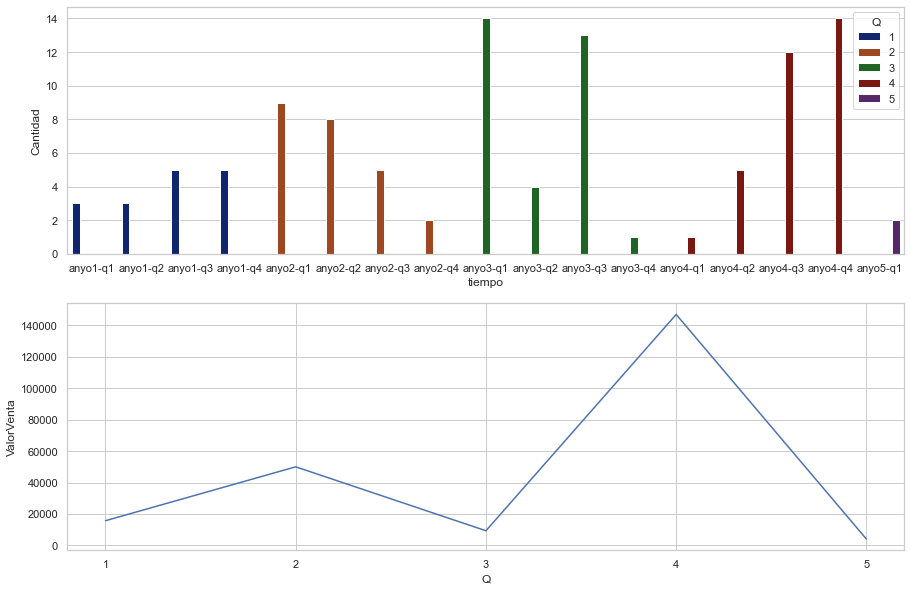

In [6]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
sns.barplot(data = df, x = "tiempo",y="Cantidad",hue ="Q", palette="dark",ax=ax[0])
sns.lineplot(data=ventas,x ="Q", y="ValorVenta", ax = ax[1],markers=True, dashes=False)
plt.show()

In [7]:
df.describe()

,ValorVenta,Cantidad
count,17.000000,17.000000
mean,13295.470588,6.235294
std,23207.071094,4.562475
min,2000.000000,1.000000
25%,3000.000000,3.000000
50%,4000.000000,5.000000
75%,10000.000000,9.000000
max,90000.000000,14.000000
